# Вебинар 5. Обучение без учителя.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1">Введение</a></span></li><li><span><a href="#Подключение-библиотек-и-скриптов" data-toc-modified-id="Подключение-библиотек-и-скриптов-2">Подключение библиотек и скриптов</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-3">Загрузка данных</a></span></li><li><span><a href="#Разбиение-на-train-и-test" data-toc-modified-id="Разбиение-на-train-и-test-4">Разбиение на train и test</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-5">Масштабирование признаков</a></span></li><li><span><a href="#Понижение-размерности:-PCA---Метод-главных-компонент" data-toc-modified-id="Понижение-размерности:-PCA---Метод-главных-компонент-6">Понижение размерности: PCA - Метод главных компонент</a></span><ul class="toc-item"><li><span><a href="#Снижение-размерности-до-2х-компонент" data-toc-modified-id="Снижение-размерности-до-2х-компонент-6.1">Снижение размерности до 2х компонент</a></span></li><li><span><a href="#Снижение-размерности-до-3х-компонент" data-toc-modified-id="Снижение-размерности-до-3х-компонент-6.2">Снижение размерности до 3х компонент</a></span></li><li><span><a href="#Использование-результатов-PCA-в-построении-прогнозной-модели" data-toc-modified-id="Использование-результатов-PCA-в-построении-прогнозной-модели-6.3">Использование результатов PCA в построении прогнозной модели</a></span></li></ul></li><li><span><a href="#Кластеризация:-k-means---Метод-k-средних" data-toc-modified-id="Кластеризация:-k-means---Метод-k-средних-7">Кластеризация: k-means - Метод k-средних</a></span><ul class="toc-item"><li><span><a href="#Оценка-оптимального-количества-кластеров" data-toc-modified-id="Оценка-оптимального-количества-кластеров-7.1">Оценка оптимального количества кластеров</a></span></li><li><span><a href="#Выделение-3-кластеров" data-toc-modified-id="Выделение-3-кластеров-7.2">Выделение 3 кластеров</a></span></li><li><span><a href="#Выделение-6-кластеров" data-toc-modified-id="Выделение-6-кластеров-7.3">Выделение 6 кластеров</a></span></li><li><span><a href="#Использование-результатов-кластеризации-в-построении-прогнозной-модели" data-toc-modified-id="Использование-результатов-кластеризации-в-построении-прогнозной-модели-7.4">Использование результатов кластеризации в построении прогнозной модели</a></span></li><li><span><a href="#Оценка-финальной-модели" data-toc-modified-id="Оценка-финальной-модели-7.5">Оценка финальной модели</a></span></li></ul></li><li><span><a href="#Задание-для-курсового-проекта" data-toc-modified-id="Задание-для-курсового-проекта-8">Задание для курсового проекта</a></span></li></ul></div>

## Введение

1. **Кластеризация** (сегментирование данных для упрощения обработки, выделение нетипичных объектов)

2. **Понижение размерности** (визуализация, сжатие информации, получение новых признаков)

## Подключение библиотек и скриптов

In [1]:
import numpy as np
import pandas as pd
import pickle

from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d.axes3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
matplotlib.rcParams.update({'font.size': 12})
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
def apply_elbow_method(X):
    distortions = []
    K = range(2,15)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
        distortions.append(sum(np.min(cdist(X, 
                                            kmeanModel.cluster_centers_, 
                                            'euclidean'), 
                                      axis=1)) / X.shape[0])

    plt.figure(figsize=(10, 6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k');

In [4]:
def display_clusters_distribution(unique_labels, labels_counts):
    plt.figure(figsize=(8,5))

    plt.bar(unique, counts)

    plt.xlabel('Clusters')
    plt.xticks(unique)
    plt.ylabel('Count')
    plt.title('Clusters distribution');

In [5]:
def reduce_dims_to_2D_space_with_PCA(df):
    pca = PCA(n_components=2)
    components = pca.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2'])
    
def reduce_dims_to_3D_space_with_PCA(df):
    pca = PCA(n_components=3)
    components = pca.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2', 'component_3'])

def reduce_dims_to_2D_space_with_TSNE(df):
    tsne = TSNE(n_components=2, random_state=42)
    components = tsne.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2'])
    
def reduce_dims_to_3D_space_with_TSNE(df):
    tsne = TSNE(n_components=3, random_state=42)
    components = tsne.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2', 'component_3'])  

In [6]:
def display_components_in_3D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, labels], axis=1)

    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    
    if labels is not None:
        if labels.nunique() > 10:
            p = ax.scatter(components_with_labels_df['component_1'], 
                       components_with_labels_df['component_2'], 
                       components_with_labels_df['component_3'], 
                       c=labels, cmap=plt.get_cmap('jet'), alpha=0.5)
        else:
             p = ax.scatter(components_with_labels_df['component_1'], 
                       components_with_labels_df['component_2'], 
                       components_with_labels_df['component_3'], 
                       c=labels, cmap=plt.get_cmap('jet', labels.nunique()), alpha=0.5)           
    else:
        p = ax.scatter(components_with_labels_df['component_1'], 
                   components_with_labels_df['component_2'], 
                   components_with_labels_df['component_3'], 
                   alpha=0.5)

    ax.set_xlabel('component_1')
    ax.set_ylabel('component_2')
    ax.set_zlabel('component_3')
    ax.set_title('3D mapping of objects')
    fig.colorbar(p);

In [7]:
def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, labels], axis=1)
    
    if labels is not None:
        if labels.nunique() > 10:
            p = components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', 
                                             c=labels.name, cmap=plt.get_cmap('jet'),
                                             alpha=0.5, figsize=(12,6), sharex=False)
        else:
            p = components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', 
                                             c=labels.name, cmap=plt.get_cmap('jet', labels.nunique()),
                                             alpha=0.5, figsize=(12,6), sharex=False)   
    else:
        p = components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', 
                                       alpha=0.5, figsize=(12,6))

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects'); 

In [8]:
def evaluate_preds(true_values_train, pred_values_train, true_values_test, pred_values_test):
    print('Train:\t' + 'R2 = ' + str(round(r2_score(true_values_train, pred_values_train), 4)) + 
          '\tMAE = ' + str(round(mean_absolute_error(true_values_train, pred_values_train), 3)) +
          '\n' +
          'Test:\t' + 'R2 = ' + str(round(r2_score(true_values_test, pred_values_test), 4)) +
          '\tMAE = ' + str(round(mean_absolute_error(true_values_test, pred_values_test), 3))
         )
    
    plt.figure(figsize=(16, 6))
       
    plt.subplot(121)
    sns.scatterplot(x=pred_values_train, y=true_values_train)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train: True vs Predicted values');
    
    plt.subplot(122)
    sns.scatterplot(x=pred_values_test, y=true_values_test)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test: True vs Predicted values');

**Пути к директориям и файлам**

In [9]:
TRAIN_DATASET_PATH = '../data/housing_prepared.csv'
#TRAIN_DATASET_PATH = '../data/housing_train.csv'

## Загрузка данных

**Описание датасета**

Статистические данные о группах домов в Калифорнии, основанные на переписи 1990 года.   

A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

* **longitude** - долгота группы
* **latitude** - широта группы
* **housing_median_age** - средний возраст дома в группе (Median age of a house within a block)
* **total_rooms** - общее количество комнат в группе домов (Total number of rooms within a block)
* **total_bedrooms** - общее количество спален в группе домов (Total number of bedrooms within a block)
* **population** - количество проживающих в группе домов (Total number of people residing within a block)
* **households** - количество семей (Total number of households, a group of people residing within a home unit, for a block)
* **ocean_proximity** - близость океана
* **median_income** - медианный доход семьи (Median income for households within a block of houses, measured in tens of thousands of US Dollars)
* **median_house_value** - медианная стоимость дома (Median house value for households within a block, measured in US Dollars)

In [10]:
df = pd.read_csv(TRAIN_DATASET_PATH)
df.drop(['ocean_proximity'], axis=1, inplace=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_household,persons_per_household,income_per_person
0,-122.23000,37.88000,41.00000,880.00000,129.00000,322.00000,126.00000,8.32520,452600.00000,0,0,1,0,6.98413,1.02381,2.55556,258.54658
1,-122.22000,37.86000,21.00000,7099.00000,1106.00000,2401.00000,1138.00000,8.30140,358500.00000,0,0,1,0,6.23814,0.97188,2.10984,34.57476
2,-122.24000,37.85000,52.00000,1467.00000,190.00000,496.00000,177.00000,7.25740,352100.00000,0,0,1,0,8.28814,1.07345,2.80226,146.31855
3,-122.25000,37.85000,52.00000,1274.00000,235.00000,558.00000,219.00000,5.64310,341300.00000,0,0,1,0,5.81735,1.07306,2.54795,101.13082
4,-122.25000,37.85000,52.00000,1627.00000,280.00000,565.00000,259.00000,3.84620,342200.00000,0,0,1,0,6.28185,1.08108,2.18147,68.07434


## Разбиение на train и test

In [11]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    shuffle=True, 
                                                    random_state=42)
X_train.shape, y_train.shape

((15476, 16), (15476,))

## Масштабирование признаков

In [13]:
# MinMaxScaler() для каждого значения x заменяет: (x - min) / (max - min)
# StandardScaler() для каждого значения x заменяет: (x - mean) / std
# RobustScaler() для каждого значения x заменяет: (x - median) / (q75 - q25)

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), 
                        columns=X_train.columns, 
                        index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), 
                        columns=X_test.columns, 
                        index=X_test.index)

features = X_train_scaled.iloc[:, :8]
features.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,15476.00000,0.00000,1.00003,-2.37937,-1.11286,0.53759,0.78191,2.54705
latitude,15476.00000,0.00000,1.00003,-1.45155,-0.79615,-0.64634,0.97345,2.95371
housing_median_age,15476.00000,0.00000,1.00003,-2.23181,-0.77842,0.02901,0.67496,1.88612
total_rooms,15476.00000,0.00000,1.00003,-1.21777,-0.54877,-0.23340,0.24001,16.26041
total_bedrooms,15476.00000,-0.00000,1.00003,-1.28081,-0.57675,-0.24739,0.25858,14.09635
population,15476.00000,-0.00000,1.00003,-1.24866,-0.55173,-0.22743,0.24452,30.10812
households,15476.00000,-0.00000,1.00003,-1.30574,-0.57898,-0.23556,0.27730,14.60313
median_income,15476.00000,0.00000,1.00003,-1.76971,-0.68769,-0.17958,0.46037,5.81815


## Понижение размерности: PCA - Метод главных компонент

**Как работает PCA**

![](PCA.png)

Первая главная компонента:

$$\text{PC1}=a_1X_A+b_1X_B$$

Вторая главная компонента:

$$\text{PC2}=a_2X_A+b_2X_B$$

где $a_i, b_i$ - веса переменных $X_A$ и $X_B$.

### Снижение размерности до 2х компонент

In [14]:
components_2d_pca = reduce_dims_to_2D_space_with_PCA(features)
components_2d_tsne = reduce_dims_to_2D_space_with_TSNE(features)

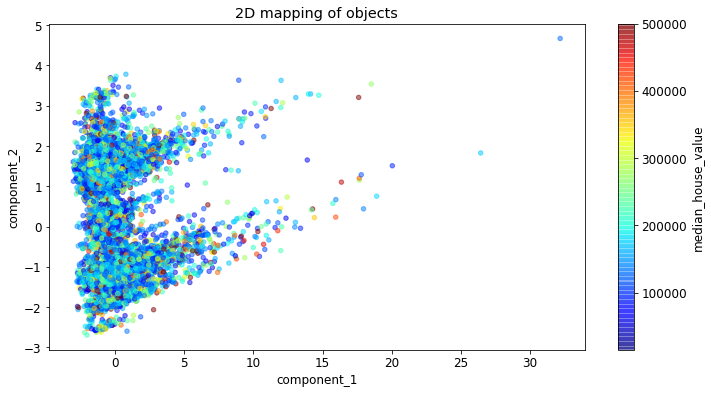

In [15]:
display_components_in_2D_space(components_2d_pca, y_train)

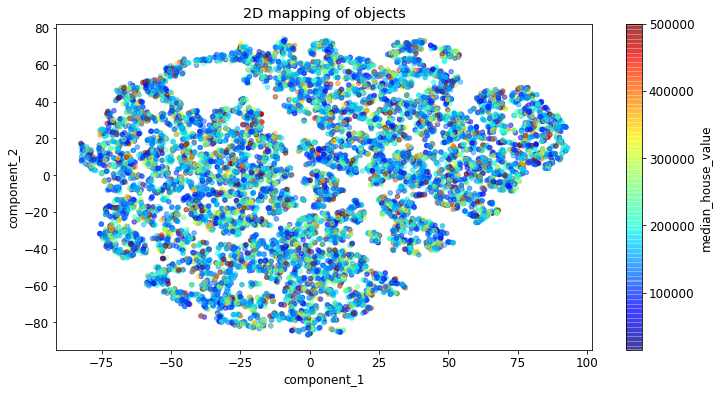

In [16]:
display_components_in_2D_space(components_2d_tsne, y_train)

### Снижение размерности до 3х компонент

In [17]:
components_3d_pca = reduce_dims_to_3D_space_with_PCA(features)
components_3d_tsne = reduce_dims_to_3D_space_with_TSNE(features)

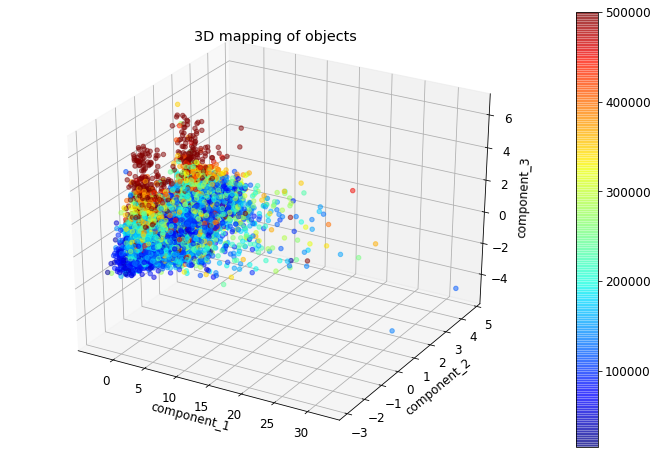

In [18]:
display_components_in_3D_space(components_3d_pca, y_train)

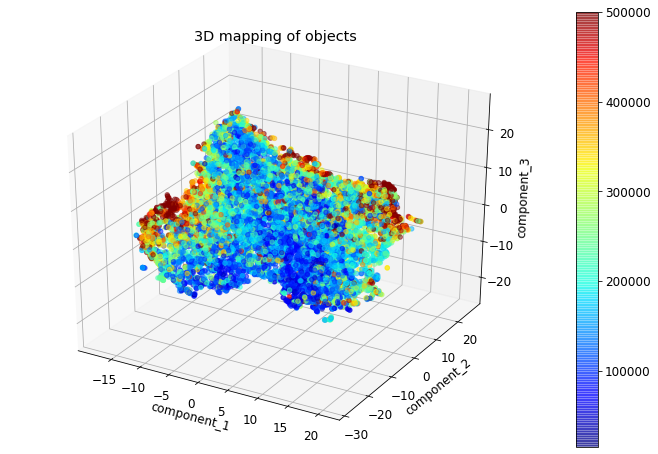

In [19]:
display_components_in_3D_space(components_3d_tsne, y_train)

### Использование результатов PCA в построении прогнозной модели

Проверим, насколько PCA улучшит результаты для предсказательной модели.

In [20]:
pca = PCA(n_components=3, random_state=42)
components = pca.fit_transform(features)
components_3d_pca_train = pd.DataFrame(data = components, 
                                      columns = ['component_1', 'component_2', 'component_3'],
                                      index=features.index)

for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            features.columns)), '\n')

1 component: 48.44% of initial variance
0.078 x longitude + -0.076 x latitude + -0.216 x housing_median_age + 0.485 x total_rooms + 0.491 x total_bedrooms + 0.469 x population + 0.493 x households + 0.043 x median_income 

2 component: 23.83% of initial variance
-0.701 x longitude + 0.702 x latitude + 0.016 x housing_median_age + 0.077 x total_rooms + 0.062 x total_bedrooms + 0.028 x population + 0.066 x households + -0.036 x median_income 

3 component: 13.39% of initial variance
-0.056 x longitude + 0.013 x latitude + -0.391 x housing_median_age + 0.097 x total_rooms + -0.116 x total_bedrooms + -0.116 x population + -0.106 x households + 0.892 x median_income 



In [21]:
components_3d_pca_train.head()

,component_1,component_2,component_3
19192,-2.12613,1.85336,-0.48557
3746,0.05079,-0.93275,1.06646
20539,6.52955,2.50723,-1.55241
14303,-1.35076,-1.87208,-1.96799
18300,-0.02629,1.47686,0.62582


In [22]:
components = pca.transform(X_test_scaled.iloc[:, :8])
components_3d_pca_test = pd.DataFrame(data = components, 
                                      columns = ['component_1', 'component_2', 'component_3'],
                                      index=X_test_scaled.index)

In [23]:
X_train_pca = pd.concat([X_train, 
                   components_3d_pca_train], axis=1)
X_train.shape, X_train_pca.shape

((15476, 16), (15476, 19))

In [24]:
X_test_pca = pd.concat([X_test, 
                   components_3d_pca_test], axis=1)
X_test.shape, X_test_pca.shape

((5159, 16), (5159, 19))

In [25]:
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=7, random_state=42)

**1 вариант**: обучим модель на данных без учета результатов PCA.

In [26]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=7, random_state=42)

Train:	R2 = 0.9327	MAE = 21371.98
Test:	R2 = 0.8253	MAE = 31142.649


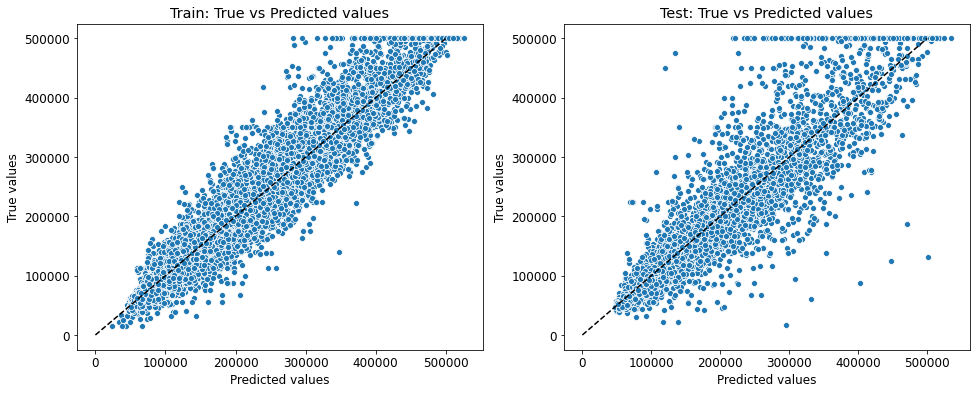

In [27]:
y_train_preds = gb_model.predict(X_train)
y_test_preds = gb_model.predict(X_test)
evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

**2 вариант**: обучим модель на данных с учетом PCA. 

In [28]:
gb_model.fit(X_train_pca, y_train)

GradientBoostingRegressor(max_depth=7, random_state=42)

Train:	R2 = 0.9337	MAE = 21182.236
Test:	R2 = 0.8225	MAE = 31369.653


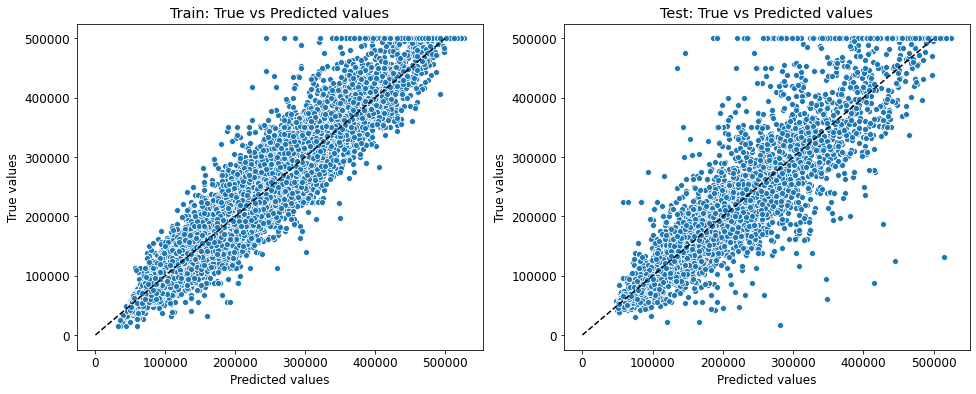

In [29]:
y_train_preds = gb_model.predict(X_train_pca)
y_test_preds = gb_model.predict(X_test_pca)
evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [30]:
feature_importances = pd.DataFrame(zip(X_train_pca.columns, gb_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
7,median_income,0.50327
9,INLAND,0.14100
14,persons_per_household,0.11124
0,longitude,0.06562
1,latitude,0.06237
2,housing_median_age,0.03539
12,rooms_per_household,0.01806
13,bedrooms_per_household,0.01392
17,component_2,0.00922
18,component_3,0.00768


## Кластеризация: k-means - Метод k-средних

**Как работает k-means**

Вы указываете кол-во кластеров

1. Центры кластеров случайно инициализируются
2. От каждой точки рассчитывается расстояние до центра каждого кластера
3. Присваиваем каждую точку к тому кластеру, к центру которого она ближе
4. Пересчитываем центры кластеров: берем среднее по всем фичам --> новый центр кластера
    
итеративно повторяем шаги 2-4 пока центры кластеров не перестанут "двигаться"

<img src="kmeans_v2.gif">

### Оценка оптимального количества кластеров

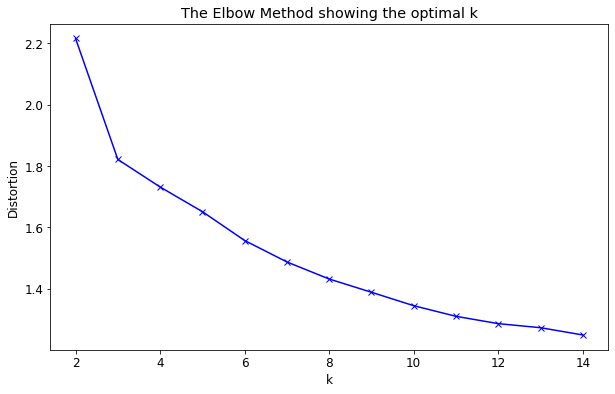

In [31]:
apply_elbow_method(features)

### Выделение 3 кластеров

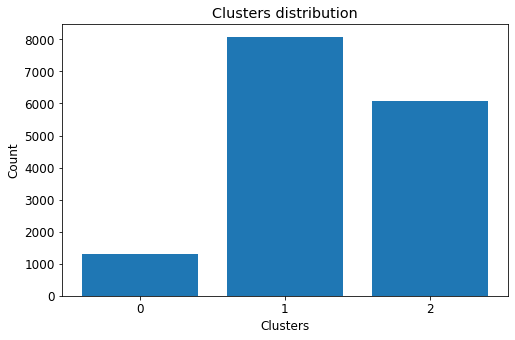

In [32]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)
labels_clast_train_3 = kmeans_3.fit_predict(features)
labels_clast_train_3 = pd.Series(labels_clast_train_3, name='clusters_3')

unique, counts = np.unique(labels_clast_train_3, return_counts=True)
display_clusters_distribution(unique, counts)

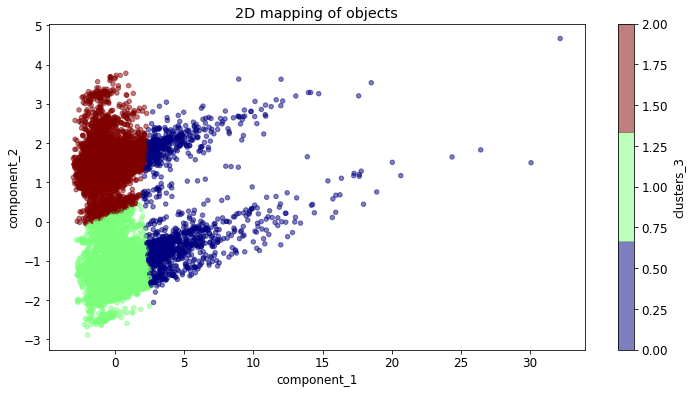

In [33]:
display_components_in_2D_space(components_2d_pca, labels_clast_train_3)

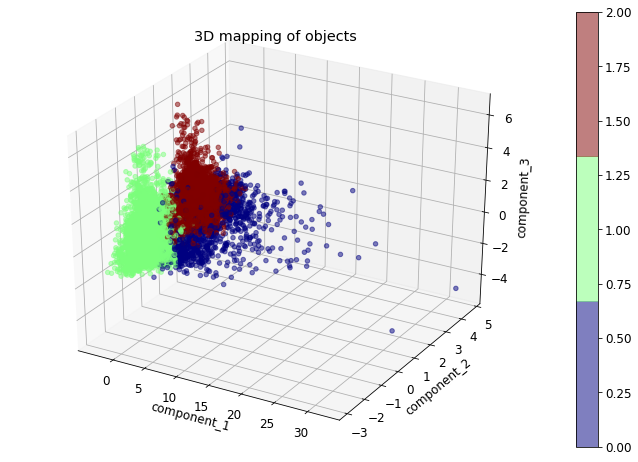

In [34]:
display_components_in_3D_space(components_3d_pca, labels_clast_train_3)

### Выделение 6 кластеров

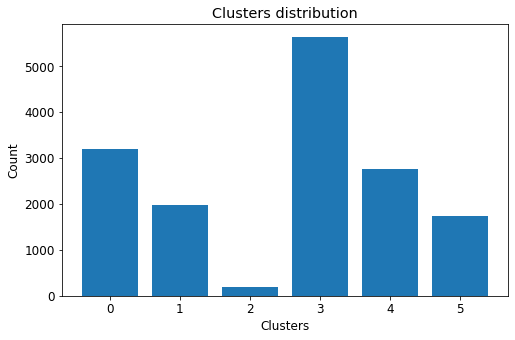

In [35]:
kmeans_6 = KMeans(n_clusters=6, random_state=42)
labels_clast_train_6 = kmeans_6.fit_predict(features)
labels_clast_train_6 = pd.Series(labels_clast_train_6, name='clusters_6')

unique, counts = np.unique(labels_clast_train_6, return_counts=True)
display_clusters_distribution(unique, counts)

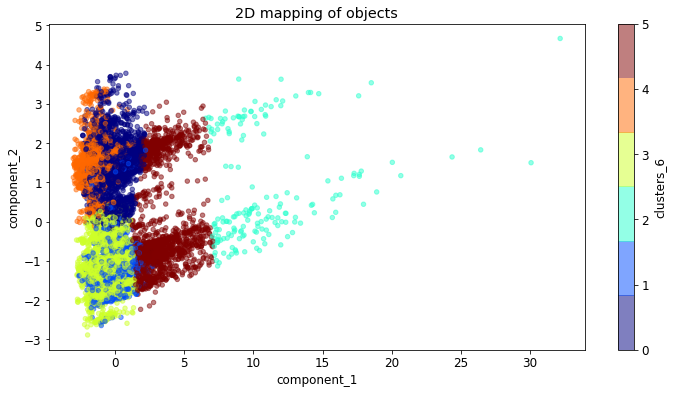

In [36]:
display_components_in_2D_space(components_2d_pca, labels_clast_train_6)

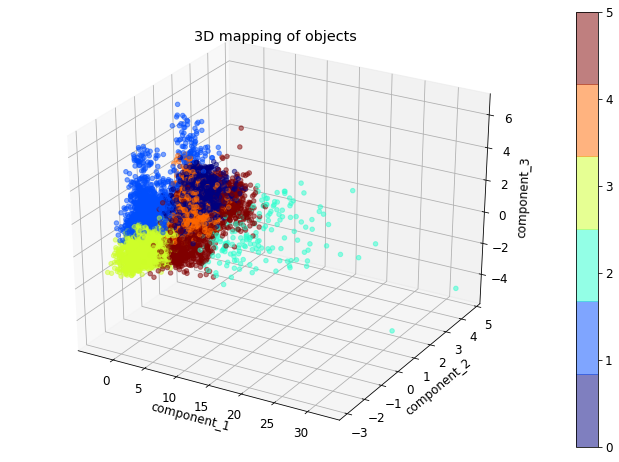

In [37]:
display_components_in_3D_space(components_3d_pca, labels_clast_train_6)

### Использование результатов кластеризации в построении прогнозной модели

Добавим новые признаки

In [38]:
X_train_ext = pd.concat([X_train_pca.reset_index(), 
                        labels_clast_train_3, 
                        labels_clast_train_6], axis=1)

X_train_ext.set_index('index', inplace=True)
X_train_pca.shape, labels_clast_train_3.shape, labels_clast_train_6.shape, X_train_ext.shape

((15476, 19), (15476,), (15476,), (15476, 21))

In [39]:
X_train_ext.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,...,NEAR OCEAN,rooms_per_household,bedrooms_per_household,persons_per_household,income_per_person,component_1,component_2,component_3,clusters_3,clusters_6
index,,,,,,,,,,,,,,,,,,,,,
19192,-122.70000,38.44000,45.00000,883.00000,202.00000,401.00000,194.00000,3.28450,1,0,...,0,4.55155,1.04124,2.06701,81.90773,-2.12613,1.85336,-0.48557,2,4
3746,-118.41000,34.16000,32.00000,3060.00000,505.00000,1159.00000,510.00000,6.37030,1,0,...,0,6.00000,0.99020,2.27255,54.96376,0.05079,-0.93275,1.06646,1,1
20539,-121.76000,38.55000,23.00000,8800.00000,1857.00000,6330.00000,1832.00000,2.06500,0,1,...,0,4.80349,1.01365,3.45524,3.26224,6.52955,2.50723,-1.55241,0,5
14303,-117.14000,32.71000,52.00000,979.00000,314.00000,975.00000,297.00000,1.23750,0,0,...,1,3.29630,1.05724,3.28283,12.69231,-1.35076,-1.87208,-1.96799,1,3
18300,-122.12000,37.41000,33.00000,2892.00000,617.00000,1250.00000,581.00000,5.37270,0,0,...,0,4.97762,1.06196,2.15146,42.98160,-0.02629,1.47686,0.62582,2,0


In [40]:
labels_clast_test_3 = pd.Series(kmeans_3.predict(X_test_scaled.iloc[:, :8]), name='clusters_3')
labels_clast_test_6 = pd.Series(kmeans_6.predict(X_test_scaled.iloc[:, :8]), name='clusters_6')

X_test_ext = pd.concat([X_test_pca.reset_index(), 
                        labels_clast_test_3, 
                        labels_clast_test_6], axis=1)

X_test_ext.set_index('index', inplace=True)
X_test_pca.shape, labels_clast_test_3.shape, labels_clast_test_6.shape, X_test_ext.shape

((5159, 19), (5159,), (5159,), (5159, 21))

### Оценка финальной модели

In [41]:
X_train_ext.isna().sum()

longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms            0
population                0
households                0
median_income             0
<1H OCEAN                 0
INLAND                    0
NEAR BAY                  0
NEAR OCEAN                0
rooms_per_household       0
bedrooms_per_household    0
persons_per_household     0
income_per_person         0
component_1               0
component_2               0
component_3               0
clusters_3                0
clusters_6                0
dtype: int64

In [42]:
#gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=7, random_state=42)
gb_model.fit(X_train_ext, y_train)

GradientBoostingRegressor(max_depth=7, random_state=42)

Train:	R2 = 0.9329	MAE = 21418.935
Test:	R2 = 0.8214	MAE = 31360.541


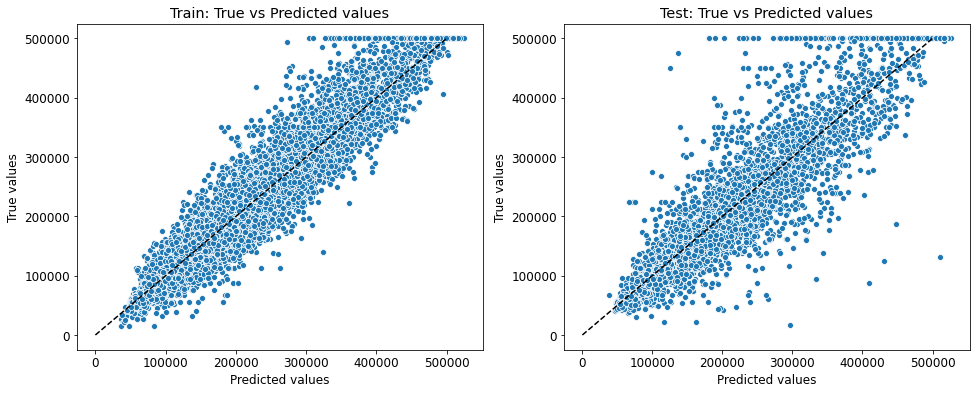

In [43]:
y_train_preds = gb_model.predict(X_train_ext)
y_test_preds = gb_model.predict(X_test_ext)
evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [44]:
feature_importances = pd.DataFrame(zip(X_train_ext.columns, gb_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
7,median_income,0.50304
9,INLAND,0.14094
14,persons_per_household,0.11138
0,longitude,0.06656
1,latitude,0.06329
2,housing_median_age,0.03519
12,rooms_per_household,0.01890
13,bedrooms_per_household,0.01362
17,component_2,0.00874
18,component_3,0.00735


In [45]:
train = pd.concat([X_train_ext, y_train], axis=1)
target_gr_by_clast = train.groupby('clusters_3')['median_house_value'].mean()

train = train.merge(target_gr_by_clast, how='left', on='clusters_3', suffixes=('', '_clust'))
train.drop('median_house_value', axis=1, inplace=True)

test = X_test_ext.merge(target_gr_by_clast, how='left', on='clusters_3', suffixes=('', '_clust'))

In [46]:
gb_model.fit(train, y_train)
y_test_preds = gb_model.predict(test)
round(r2_score(y_test, y_test_preds), 4)

0.8209

In [47]:
feature_importances = pd.DataFrame(zip(train.columns, gb_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
7,median_income,0.50306
9,INLAND,0.14095
14,persons_per_household,0.11109
0,longitude,0.06649
1,latitude,0.06347
2,housing_median_age,0.03521
12,rooms_per_household,0.01871
13,bedrooms_per_household,0.01387
17,component_2,0.00859
18,component_3,0.00751


In [48]:
feature_imp_list = feature_importances.nlargest(17, 'importance')['feature_name'].to_list()
gb_model.fit(train[feature_imp_list], y_train)
y_test_preds = gb_model.predict(test[feature_imp_list])
round(r2_score(y_test, y_test_preds), 4)

0.8249

## Задание для курсового проекта 


На уроке 10 ("Вебинар. Консультация по итоговому проекту") разберем пример решения курсовой работы. См здесь - https://www.kaggle.com/irinatel/baseline-0520


Метрика:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

Сдача проекта:
1. Результаты собираются до **12.10.21 20:00**. 13 октября рейтинг будет выставлен в разделе Обсуждения Урока 10.
2. Прислать в раздел Задания Урока 10 ссылки на **ноутбук** и на **файл с предсказаниями**.
3. Необходимо получить **R2 > 0.65**.


Примечание:
Файл с предсказанными ценами для квартир из test.csv назвать по образцу YourName_predictions_group.csv. Он должен содержать два поля (Id, Price) и 5001 строку (шапка + 5000 предсказаний).
____________
Рекомендации для файла с кодом (YourName_solution_group.ipynb):
1. Весь проект должен быть в одном файле
2. Файл должен содержать заголовки и комментарии
3. Повторяющиеся операции лучше оформлять в виде функций
4. По возможности добавлять графики, описывающие данные 
5. Оставить только лучшую модель, то есть не включать в код все варианты решения проекта
6. Проект должен полностью отрабатывать за разумное время (не больше 10 минут),
поэтому в финальный вариант лучше не включать GridSearch с перебором большого количества сочетаний параметров, а сразу использовать подобранные параметры
7. При использовании статистик (среднее, медиана и т.д.) в качестве признаков, считать их на трейне и использовать на контрольных и тестовых данных
8. Оценку качества модели можно выполнять на отложенной выборке или использовать кросс-валидацию. Также рекомендуется самостоятельно проверять точность предсказания на https://www.kaggle.com/c/realestatepriceprediction